## Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np 

In [2]:
housing = pd.read_csv(r"C:\Users\addwi\ML_Project\data.cvs.csv")

In [3]:
housing.shape

(506, 14)

In [4]:
housing.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts() 

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284664,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705051,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.620500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline 

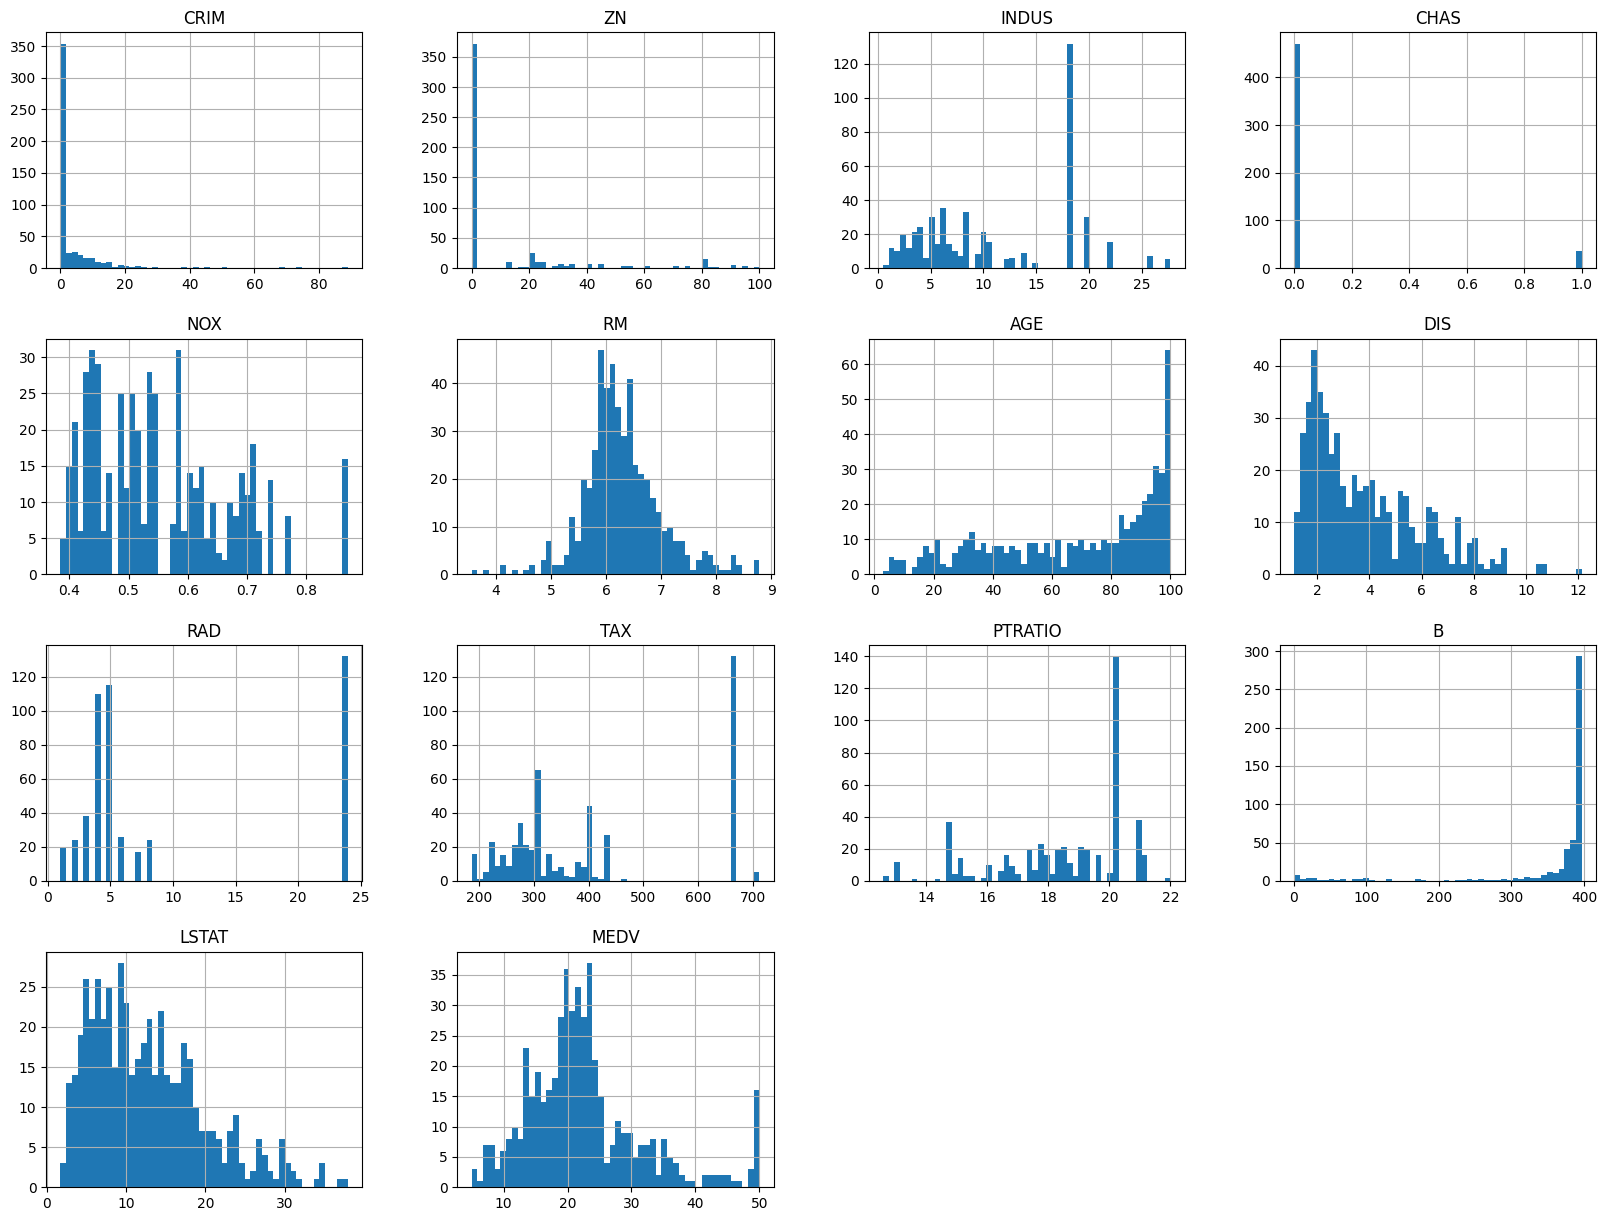

In [9]:
import matplotlib.pyplot as plt 
housing.hist(bins = 50 , figsize=(20,15) ) 
plt.show() 

## Train Test Split 

In [10]:
'''def split_train_test(data,test_ratio):
    np.random.seed(42) 
    shuffled = np.random.permutation(len(data)) 
    test_set_size = int(len(data)*test_ratio) 
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size : ] 
    return data.iloc[train_indices],data.iloc[test_indices]'''

'def split_train_test(data,test_ratio):\n    np.random.seed(42) \n    shuffled = np.random.permutation(len(data)) \n    test_set_size = int(len(data)*test_ratio) \n    test_indices = shuffled[:test_set_size]\n    train_indices = shuffled[test_set_size : ] \n    return data.iloc[train_indices],data.iloc[test_indices]'

In [11]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing,test_size = 0.2 , random_state=42) 
print(len(train_set) , len(test_set) ) 

404 102


In [12]:
print("Rows in train_set:" , len(train_set),"Rows in test_set:" , len(test_set)) 

Rows in train_set: 404 Rows in test_set: 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2 , random_state=42)
for train_index,test_index in split.split(housing, housing['CHAS'] ) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_train_set["CHAS"].value_counts() 

CHAS
0    376
1     28
Name: count, dtype: int64

In [15]:
strat_test_set["CHAS"].value_counts() 

CHAS
0    95
1     7
Name: count, dtype: int64

In [16]:
housing = strat_train_set.copy() 
housing 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


## Looking For Correlations 

In [17]:
corr_matrix = housing.corr() 

In [18]:
corr_matrix["MEDV"].sort_values(ascending=False)  #Relationship with price of house with different parameters .

MEDV       1.000000
RM         0.679015
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>]], dtype=object)

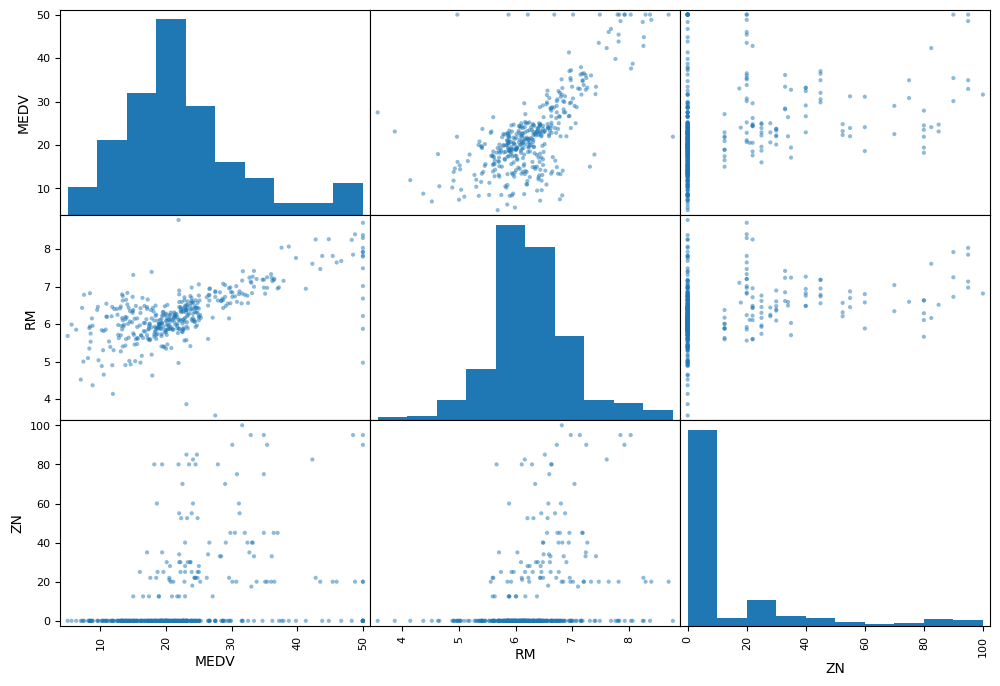

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN"]
scatter_matrix(housing[attributes] , figsize=(12,8)) 

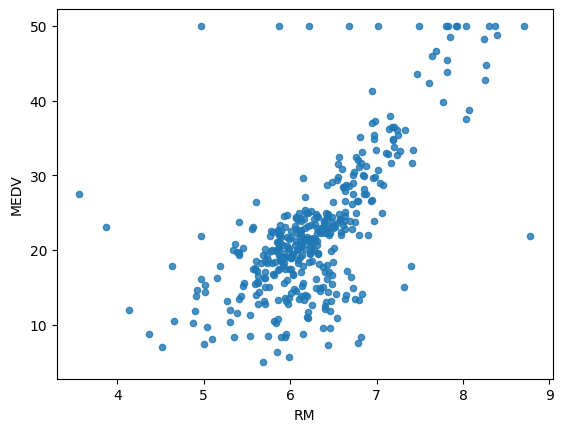

In [20]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha =0.8)
plt.show() 

## Attribute Combinations 

In [21]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [22]:
housing.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix = housing.corr() 
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.679015
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526283
LSTAT     -0.740494
Name: MEDV, dtype: float64

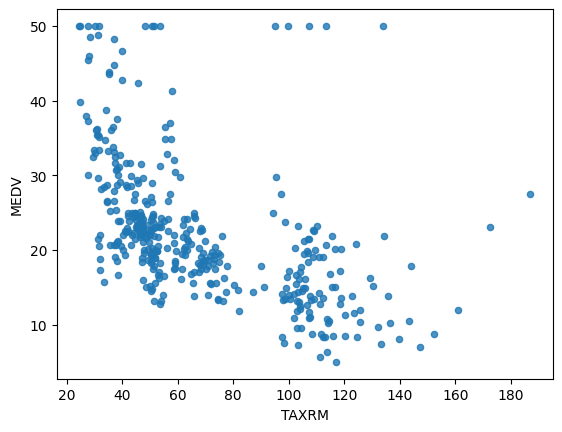

In [24]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8) 
plt.show() 

In [25]:
housing = strat_train_set.drop("MEDV",axis =1 ) 
housing_labels = strat_train_set["MEDV"].copy()

In [26]:
housing  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [27]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


## Missing Attributes


In [28]:
a = housing.dropna(subset=["RM"]) #option1 
a.shape

(398, 13)

In [29]:
b = housing.drop("RM",axis=1) 
b.shape

(404, 12)

In [30]:
median = housing["RM"].median() 

In [31]:
median 

np.float64(6.21)

In [32]:
housing["RM"].fillna(median) 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
from sklearn.impute import SimpleImputer  ## use for missing values 
imputer = SimpleImputer(strategy="median") 
imputer.fit(housing) 

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns=housing.columns)   

In [36]:
housing_tr.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278837,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710851,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn design

In [37]:
'''## Primarily three types of objects:
1.Estimators
2.Transformers
3.Predictors '''

'## Primarily three types of objects:\n1.Estimators\n2.Transformers\n3.Predictors '

In [38]:
## Primarily two types of feature Scaling 
## 1.Min-Max(Normalization)
## 2.Standardization 

## Creating a pipeline 

In [39]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing) 

In [41]:
housing  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [42]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for real estates 

In [43]:
housing_num_tr.shape

(404, 13)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor() 
#model = LinearRegression()
#model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels) 

RandomForestRegressor()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_lables = housing_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data) 

array([22.456, 25.438, 16.299, 23.481, 23.753])

In [49]:
list(some_lables) 

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model 

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels ,housing_predictions) 
rmse = np.sqrt(mse)

In [51]:
print(rmse) 

1.2139293667366893


## Using better evaluation technique--Cross validation 

In [52]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score (model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores 

array([2.87939214, 2.86558671, 4.58296357, 2.611796  , 3.40408906,
       2.90475477, 4.9315738 , 3.40376984, 3.24123372, 3.41735101])

In [54]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean() ) 
    print("Standard Deviation:",scores.std() ) 

In [55]:
print_scores(rmse_scores) 

Scores: [2.87939214 2.86558671 4.58296357 2.611796   3.40408906 2.90475477
 4.9315738  3.40376984 3.24123372 3.41735101]
Mean: 3.4242510613850285
Standard Deviation: 0.7202737113585571


## Saving The Model

In [56]:
from joblib import dump,load
dump(model,"realestate.joblib")

['realestate.joblib']

## Testing The Model on Test Data

In [57]:
X_test= strat_test_set.drop("MEDV",axis=1) 
Y_test = strat_test_set["MEDV"]
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared) 
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse) 

In [58]:
print(final_rmse) 

2.947114808771186


In [59]:
print(final_predictions, list(Y_test)) 

[24.832 11.058 26.035 22.172 19.484 14.792 20.489 15.083 31.605 41.884
 19.475 11.792 23.601 26.444 19.57  11.445 31.218 14.479 23.91  18.886
 20.179 17.895 16.136 21.801 18.469 30.618 16.315 32.593  8.8   33.658
 23.791 21.323 22.879 10.521 21.349 11.095 42.898 24.441 23.499 42.057
 23.801 28.927 20.002 20.936 18.652 33.395 44.71  20.206 20.145 21.983
 21.298 14.45  21.342 15.385 25.089 32.565 42.101 29.462 19.197 20.711
 46.507  9.541 18.793 25.317 14.705 33.179 19.566 17.814 18.973 33.989
 26.047 22.759 20.889 22.632 34.559 13.279 15.855 20.029 20.596 21.724
 22.659 21.218 13.819 22.841 20.43  21.264 13.634 21.134 21.679 23.651
 18.322 26.514  7.534 26.384 19.846 29.209 19.822 31.156 14.201 26.884
 20.782 20.439] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [61]:
prepared_data[0]


array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24062492, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Prediction using the model 

In [62]:
from joblib import dump,load 
model = load('realestate.joblib') 
import numpy as np 
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24062492, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.456])